In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


## Load the data 

In [2]:
data = fetch_openml('mnist_784', version=1, as_frame=False)
images = np.asarray(data.data)
labels = data.target.astype(int)


## Add noise and train the model to reconstruct the clean image 

In [4]:

# Train/Test split
# Normalize data 
X = images / 255.0
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Add noise
noise_factor = 0.3
X_train_noisy = X_train + noise_factor * np.random.normal(0.0, 1.0, X_train.shape)
X_test_noisy  = X_test  + noise_factor * np.random.normal(0.0, 1.0, X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy  = np.clip(X_test_noisy, 0., 1.)


In [ ]:
model = RandomForestRegressor(
    n_estimators=50,
    n_jobs=-1,
    random_state=42
)

# Train noisy → clean
model.fit(X_train_noisy, X_train)


In [ ]:

# Predict denoised images
denoised_images = model.predict(X_test_noisy)

## Evaluate the model performance 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse  = mean_squared_error(X_test, denoised_images)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(X_test, denoised_images)
r2   = r2_score(X_test, denoised_images)

print("Model Performance:")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R2   : {r2:.4f}")


## Plot and predict the clean image

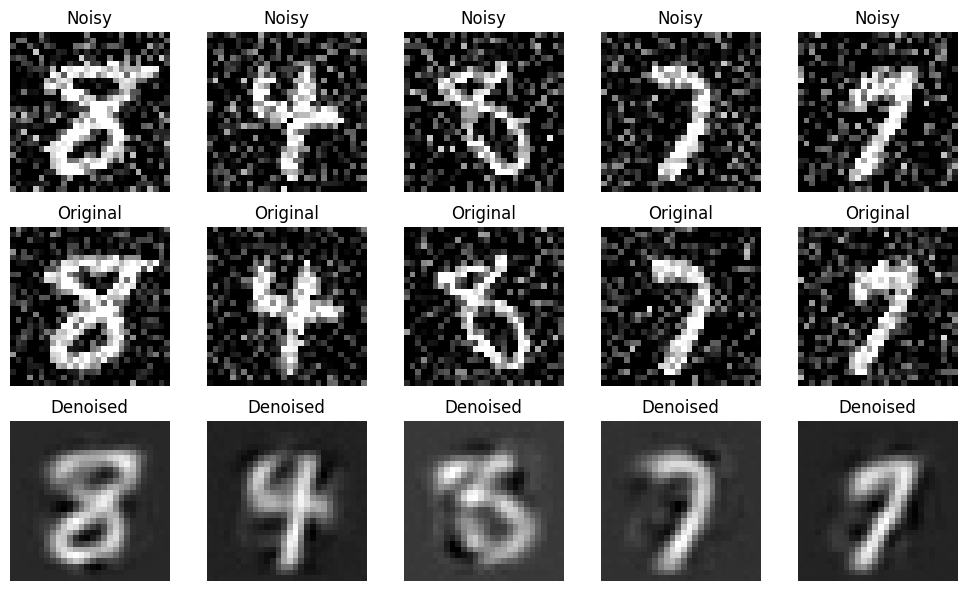

In [ ]:
def plot_results(noisy, clean, reconstructed, n=5):
    plt.figure(figsize=(10, 6))
    for i in range(n):
        # Noisy
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy")
        plt.axis('off')

        # Clean (Target)
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(clean[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Denoised")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_results(X_test_noisy, X_test, denoised_images)

In [ ]:
import matplotlib.pyplot as plt

def plot_results(noisy, clean, reconstructed, n=5):
    plt.figure(figsize=(10,6))

    for i in range(n):

        # Noisy Image
        plt.subplot(3, n, i+1)
        plt.imshow(noisy[i].reshape(28,28), cmap='gray')
        plt.title("Noisy")
        plt.axis('off')

        # Original Clean Image
        plt.subplot(3, n, i+1+n)
        plt.imshow(clean[i].reshape(28,28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Predicted Clean Image
        plt.subplot(3, n, i+1+2*n)
        plt.imshow(reconstructed[i].reshape(28,28), cmap='gray')
        plt.title("Denoised")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
plot_results(X_test_noisy, X_test, denoised_images)